In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
data_=pd.read_csv("WarrantyClaim.csv")
data_.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,...,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,...,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,...,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,...,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,...,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


 **Performing Data Insepection**

In [3]:
# checking the shape of the dataset
data_.shape

(358, 21)

In [4]:
#checking for duplicate values
data_.duplicated(subset=None,keep='first').sum()

0

In [5]:
#droping unwanted columns
data=data_.drop("Unnamed: 0",axis='columns')
data.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,0,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,0,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,2,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,0,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,0,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


In [6]:
#checking for na values
print(data.isna().sum())

Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64


In [7]:
# checking DataTypes
data.dtypes

,0
Region,object
State,object
Area,object
City,object
Consumer_profile,object
Product_category,object
Product_type,object
AC_1001_Issue,int64
AC_1002_Issue,int64
AC_1003_Issue,int64


**Looking for the total count of 1, representing fraudulent claims, and the total count of 0, representing non-fraudulent claims.**

In [8]:
len(data[data.Fraud==1])

35

In [9]:
len(data[data.Fraud==0])

323

Since there is a significant difference between the total count of 1 (35 fraudulent claims) and the total count of 0 (323 non-fraudulent claims), we can clearly state that the data is imbalanced.

**Examining the Region Column**

In [10]:
# unique values in Region columns
data.Region.unique()

array(['South', 'North', 'North East', 'North West', 'South East',
       'South West', 'West', 'East'], dtype=object)

In [11]:
# Count of each region in the 'Region' column
data.groupby('Region')['Region'].agg('count').sort_values(ascending=False)


,Region
Region,
South,85
North East,53
South East,50
West,49
East,39
North,33
North West,27
South West,22


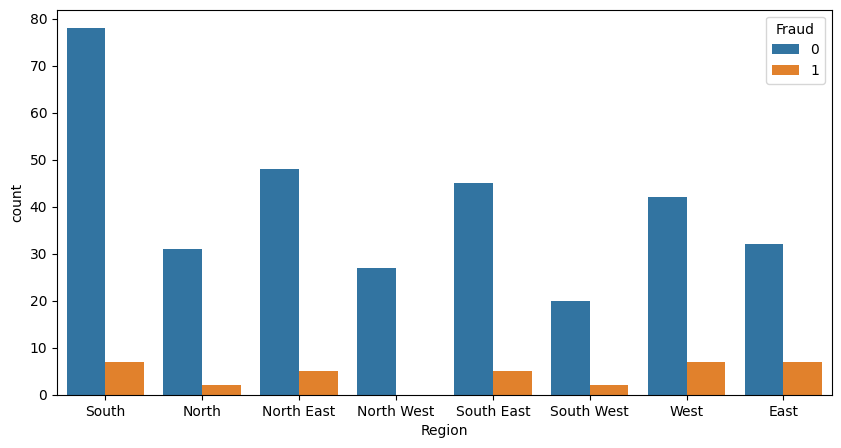

In [12]:
# Ploting Region and seeing Frauds
plt.figure(figsize=(10,5))
sns.countplot(x='Region',hue='Fraud',data=data)
plt.show()


In [13]:
# The total number of fraudulent claims based on the regions.
region_stats=data.groupby('Region')['Fraud'].agg('sum').sort_values(ascending=False)
region_stats

,Fraud
Region,
East,7
South,7
West,7
North East,5
South East,5
North,2
South West,2
North West,0


*In the "Region" column, there are three regions with the highest number of fraudulent claims, each having 7 claims. There are no fraudulent claims in the North West region. Overall, the number of fraudulent claims is significantly lower compared to non-fraudulent claims.*


**Examining the State Column**


In [14]:
#unique values in state column and total no of unique values
print(data.State.unique()), print("\nTotal Number of States : ",len(data.State.unique()))

['Karnataka' 'Haryana' 'Tamil Nadu' 'Jharkhand' 'Kerala' 'Andhra Pradesh'
 'Bihar' 'Gujarat' 'Delhi' 'Maharashtra' 'West Bengal' 'Goa'
 'Jammu and Kashmir' 'Assam' 'Rajasthan' 'Madhya Pradesh' 'Uttar Pradesh'
 'Tripura' 'Himachal Pradesh' 'Orissa']

Total Number of States :  20


(None, None)

In [15]:
# Count of each State in the 'State' column
state_stats=data.groupby('State')['State'].agg('count').sort_values(ascending=False)
state_stats

,State
State,
Andhra Pradesh,59
Tamil Nadu,46
Maharashtra,39
Karnataka,30
Gujarat,29
Kerala,28
Uttar Pradesh,24
Delhi,22
Bihar,19


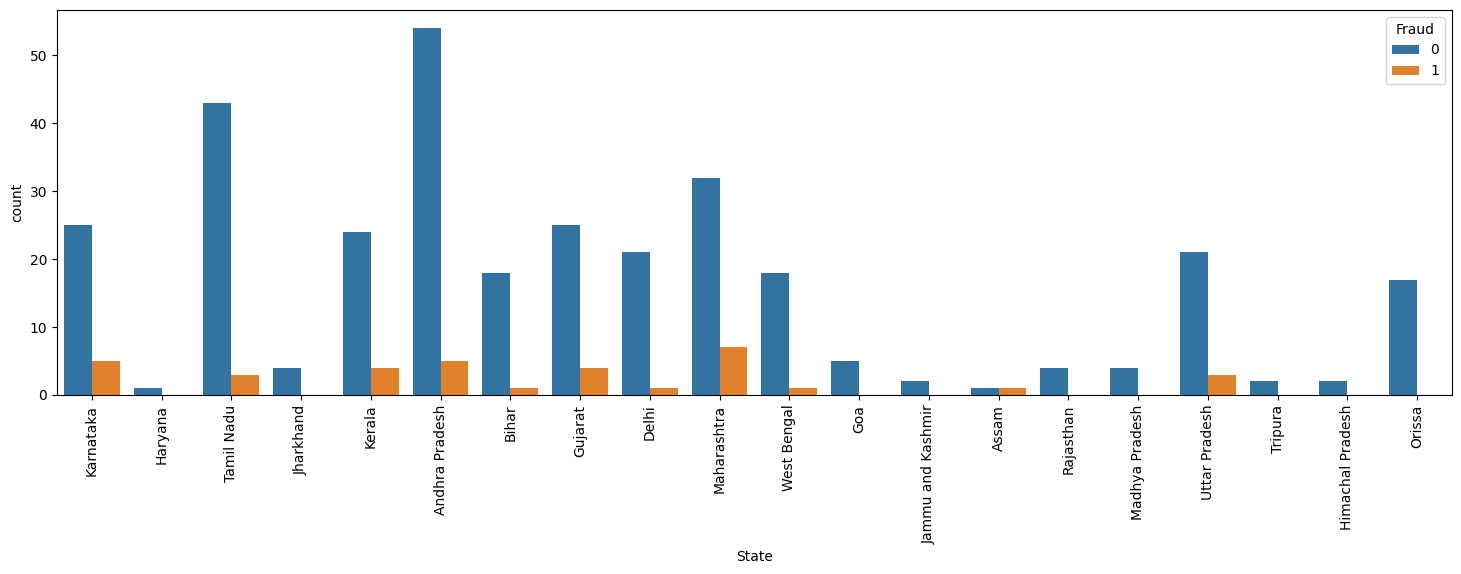

In [16]:
plt.figure(figsize=(18, 5))
sns.countplot(x='State', hue='Fraud', data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.show()

In [17]:
region_stats=data.groupby('State')['Fraud'].agg('sum').sort_values(ascending=False)
region_stats

,Fraud
State,
Maharashtra,7
Andhra Pradesh,5
Karnataka,5
Kerala,4
Gujarat,4
Uttar Pradesh,3
Tamil Nadu,3
Assam,1
Bihar,1


*Maharashtra has the highest number of reported fraud cases (7), indicating it has the most significant issue with fraud among the states listed.
Andhra Pradesh and Karnataka both have 5 fraud cases, making them the second most affected states.
Kerala and Gujarat follow with 4 cases each.
Uttar Pradesh and Tamil Nadu have 3 cases, which is relatively lower but still notable.
Several states, including Assam, Bihar, Delhi, and West Bengal, have reported only 1 fraud case each.
Most of the other states, such as Jharkhand, Goa, Madhya Pradesh, Jammu and Kashmir, Orissa, Rajasthan, and others, report no fraud cases.*

<ipython-input-18-561007192897>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
<ipython-input-18-561007192897>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts[state_counts < 10].index, y=state_counts[state_counts < 10], palette='viridis', ax=ax2)
<ipython-input-18-561007192897>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


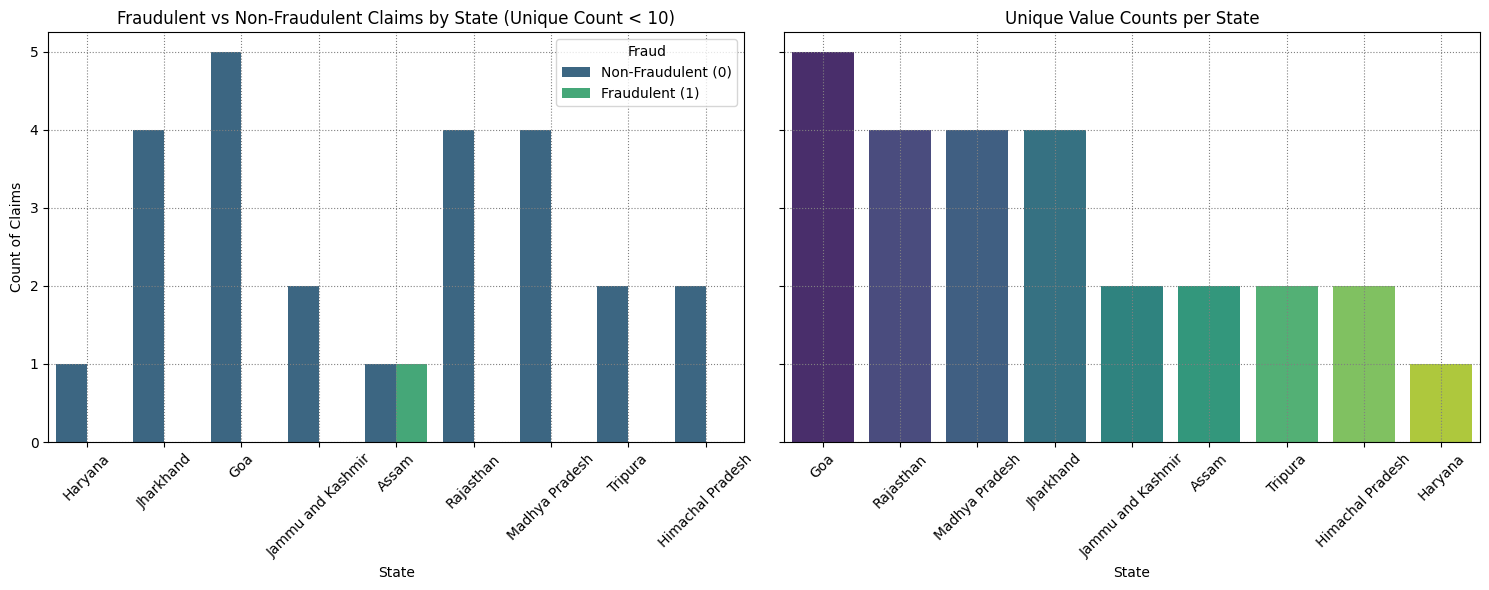

In [18]:
# Identify instances of fraud in the states where the unique value is less than 10.

# Count unique values per state
state_counts = data['State'].value_counts()
states_with_few_values = state_counts[state_counts < 10].index

# Filter instances for states with less than 10 occurrences
filtered_data = data[data['State'].isin(states_with_few_values)]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plotting fraudulent and non-fraudulent claims
sns.countplot(data=filtered_data, x='State', hue='Fraud', palette='viridis', ax=ax1)
ax1.set_title('Fraudulent vs Non-Fraudulent Claims by State (Unique Count < 10)')
ax1.set_xlabel('State')
ax1.set_ylabel('Count of Claims')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.legend(title='Fraud', labels=['Non-Fraudulent (0)', 'Fraudulent (1)'])
ax1.grid(True, linestyle=':', color='gray')  # Adding dotted grid

# Plotting unique value counts
sns.barplot(x=state_counts[state_counts < 10].index, y=state_counts[state_counts < 10], palette='viridis', ax=ax2)
ax2.set_title('Unique Value Counts per State')
ax2.set_xlabel('State')
ax2.set_ylabel('Unique Count')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.grid(True, linestyle=':', color='gray')  # Adding dotted grid

plt.tight_layout()
plt.show()


The graph reveals that in states with five or fewer claimants, no fraudulent warranty claims have been made, with the exception of Assam, where a single fraudulent claim exists. Consequently, we will group all states with five or fewer claimants and no fraudulent claims under the label "other_states."

*Any state having less than 10 data points tagged as "Other_state" location. This way number of categories can be reduced it will help us with having fewer dummy columns*

In [19]:

# Count unique values per state
state_counts = data['State'].value_counts()

# Filter states with 5 or fewer claimants
states_with_few_claimants = state_counts[state_counts <= 5].index

# Identify states with no fraudulent claims
non_fraudulent_states = data[data['Fraud'] == 0]['State'].unique()

# Replace state names with "other_states" for states with 5 or fewer claimants and no fraudulent claims
data['State'] = np.where((data['State'].isin(states_with_few_claimants)) &
                         (data['State'].isin(non_fraudulent_states)),
                         'other_states', data['State'])

# Check the updated data
print(data[['State', 'Fraud']])


              State  Fraud
0         Karnataka      1
1         Karnataka      0
2      other_states      0
3        Tamil Nadu      0
4      other_states      0
..              ...    ...
353      Tamil Nadu      0
354         Gujarat      0
355      Tamil Nadu      0
356   Uttar Pradesh      1
357  Andhra Pradesh      0

[358 rows x 2 columns]


In [20]:
#count total no of other_states in state column
data['State'].value_counts()


,count
State,
Andhra Pradesh,59
Tamil Nadu,46
Maharashtra,39
Karnataka,30
Gujarat,29
Kerala,28
other_states,26
Uttar Pradesh,24
Delhi,22



**Examining the Consumer_profile Column**

In [21]:
#unique values
data['Consumer_profile'].unique()

array(['Business', 'Personal'], dtype=object)

In [22]:
data['Consumer_profile'].value_counts()

,count
Consumer_profile,
Personal,224
Business,134


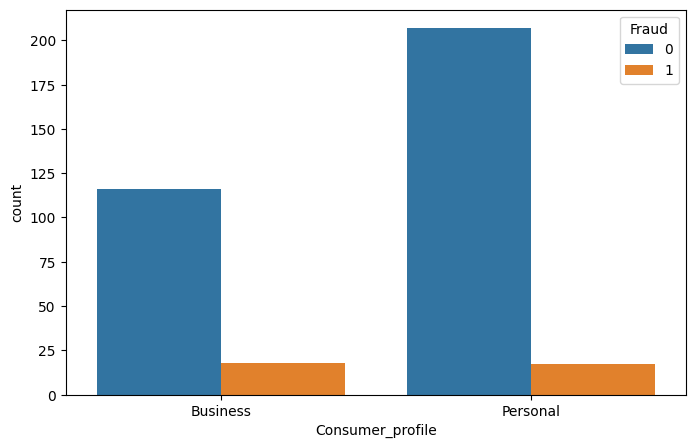

In [23]:
# The relationship between consumer profiles (Business and Personal) and whether fraud occurred .

plt.figure(figsize=(8, 5))
sns.countplot(x='Consumer_profile', hue='Fraud', data=data)

plt.show()



1.   **Business Profile:**
*   The majority of Business profile consumers do not commit fraud (high count for Fraud = 0).
*   A small number of Business profile consumers are involved in fraud (low count for Fraud = 1).


2.   **Personal Profile:**

*   Personal profile consumers also have a large number of non-fraudulent cases (Fraud = 0), with a higher count than the Business profile.
*   The number of fraudulent cases in the Personal profile is slightly higher compared to the Business profile, but still low overall.






**Examining the Product_category Column**

In [24]:
# Unique values

data['Product_category'].unique()

array(['Entertainment', 'Household'], dtype=object)

In [25]:
data['Product_category'].value_counts()

,count
Product_category,
Entertainment,191
Household,167


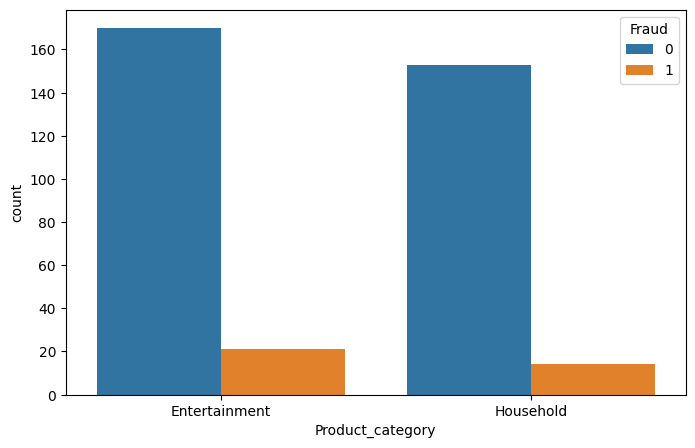

In [26]:
# The relationship between Product category (Entertainment and Household) and whether fraud occurred .

plt.figure(figsize=(8, 5))
sns.countplot(x='Product_category', hue='Fraud', data=data)

plt.show()

*In both the Entertainment and Household categories, non-fraudulent transactions dominate, with fraudulent activities occurring at a much lower rate.
The proportion of fraudulent transactions is similar across both categories, suggesting that fraud occurrence is consistent regardless of the product category.*


**Examining the Product_type Column**

In [27]:
# Unique Values

data['Product_type'].unique()

array(['TV', 'AC'], dtype=object)

In [28]:
data['Product_type'].value_counts()

,count
Product_type,
TV,191
AC,167


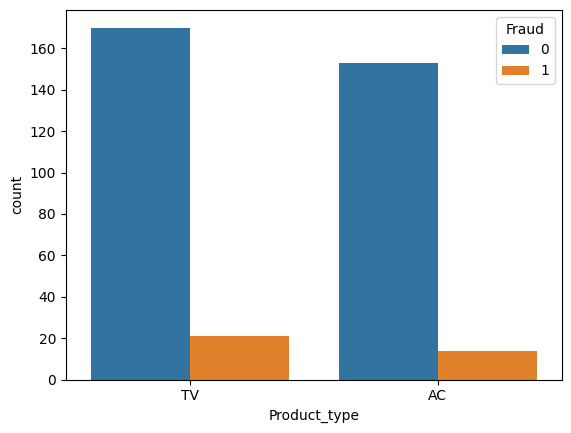

In [29]:
# The relationship between Product type (TV and AC) and whether fraud occurred .
sns.countplot(x='Product_type', hue='Fraud', data=data)

plt.show()

**Examining 'AC_1001_Issue', 'AC_1002_Issue', 'AC_1003_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue' Columns**

In [30]:

columns = ['AC_1001_Issue', 'AC_1002_Issue', 'AC_1003_Issue',
           'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue']

print(f"Unique Values :\n")
for col in columns:

    print(f"{col} : {data[col].unique()}\n")


Unique Values :

AC_1001_Issue : [0 1 2]

AC_1002_Issue : [0 1 2]

AC_1003_Issue : [0 2 1]

TV_2001_Issue : [1 0 2]

TV_2002_Issue : [2 0 1]

TV_2003_Issue : [0 2 1]



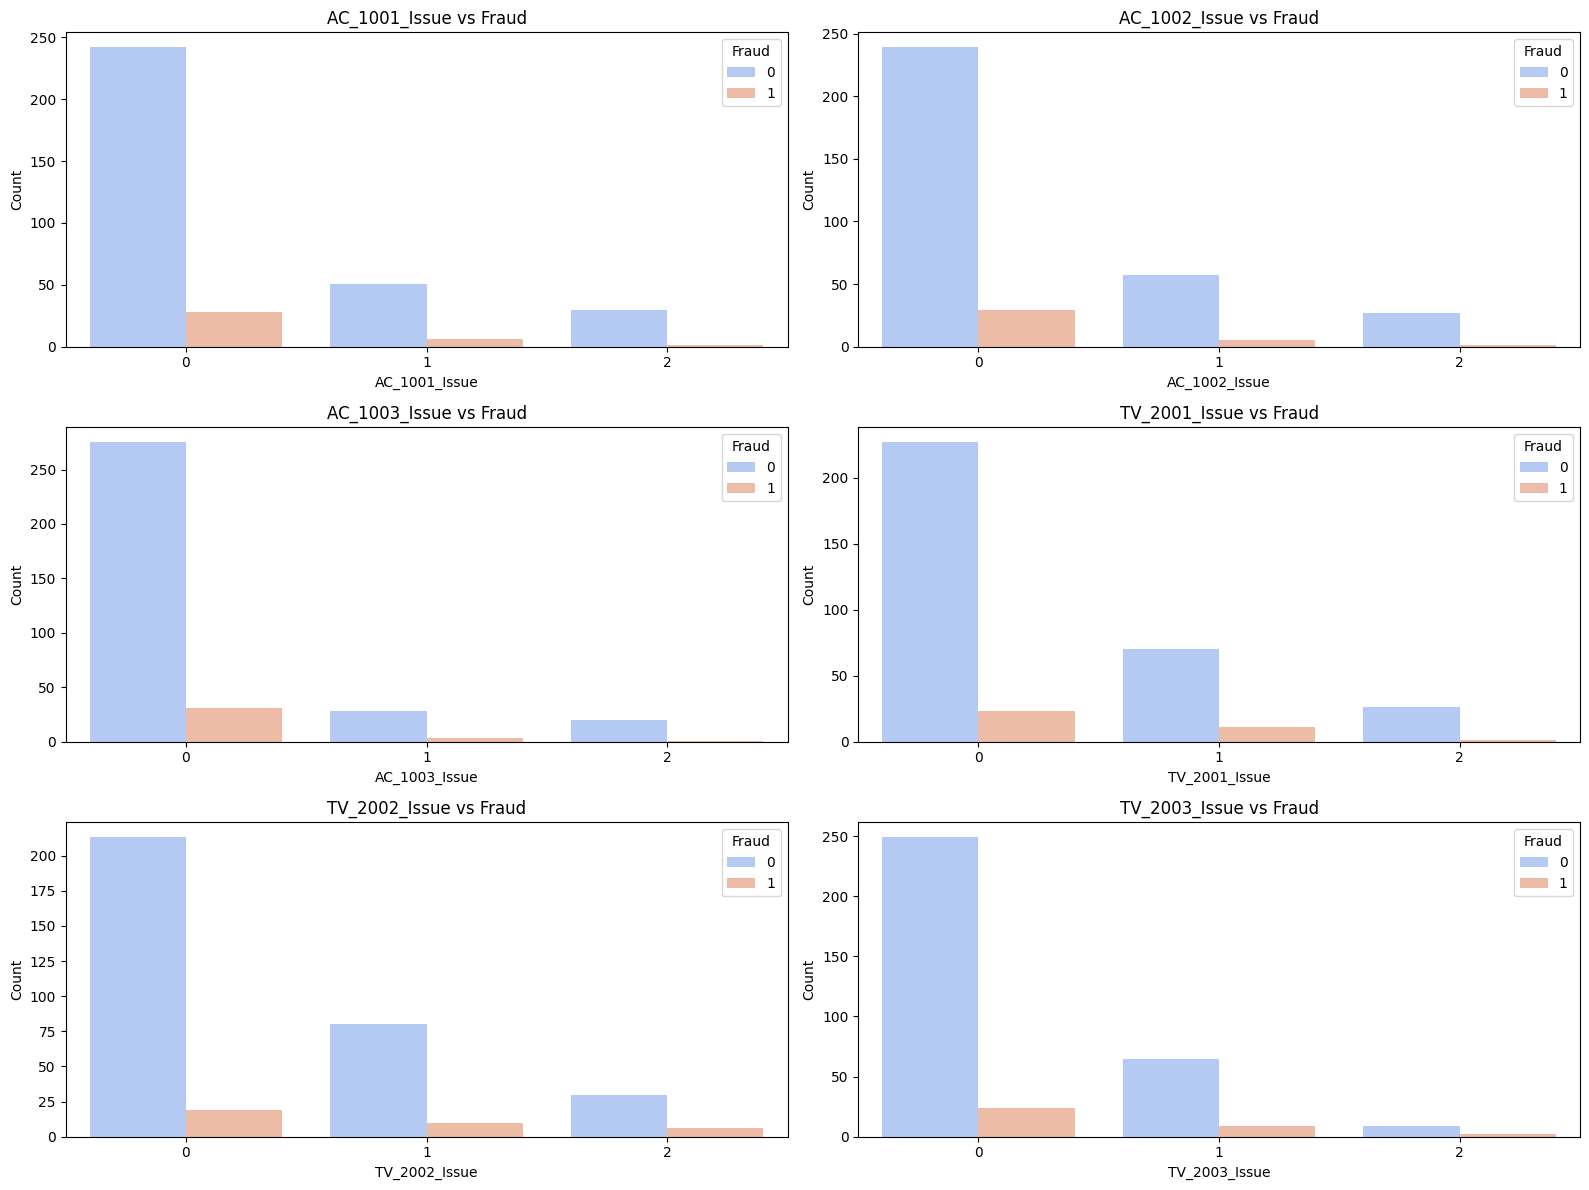

In [31]:
issue_columns = ['AC_1001_Issue', 'AC_1002_Issue', 'AC_1003_Issue',
                 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue']

# Set up the figure and axes
plt.figure(figsize=(16, 12))

# Loop through each issue column and plot a countplot
for i, col in enumerate(issue_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, hue='Fraud', data=data, palette='coolwarm')
    plt.title(f'{col} vs Fraud')
    plt.xlabel(col)
    plt.ylabel('Count')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



*   In all plots, the vast majority of cases have an issue code of 0, meaning no reported issue for both fraudulent and non-fraudulent claims. The frequency of no issues (code 0) is higher for non-fraudulent cases, indicating that claims without any recorded issues are less likely to be fraudulent.
*   As the issue codes increase (from 1 to 2), the proportion of fraudulent claims (labeled as 1 in orange) tends to increase relative to non-fraudulent claims. This suggests that claims involving higher severity or additional issues (coded 1 or 2) are more likely to be associated with fraud.

*   The pattern holds consistently across different products (e.g., air conditioners and TVs), implying that the presence of reported issues (especially with codes 1 and 2) across these products increases the likelihood of fraudulent claims.
*   There are still fraudulent claims recorded under Issue = 0, though they are significantly fewer compared to non-fraudulent claims in the same category. This indicates that while issues are a strong indicator of fraud, there may be other contributing factors to fraudulent behavior even when no issue is reported





**Examining "Purchased_from" Column**

In [32]:
# Unique Values

Purchased_from=data.Purchased_from.unique()
Purchased_from

array(['Manufacturer', 'Dealer', 'Internet'], dtype=object)

In [33]:
# Count of Unique values in Purchased_from column
data['Purchased_from'].value_counts()

,count
Purchased_from,
Dealer,139
Manufacturer,135
Internet,84


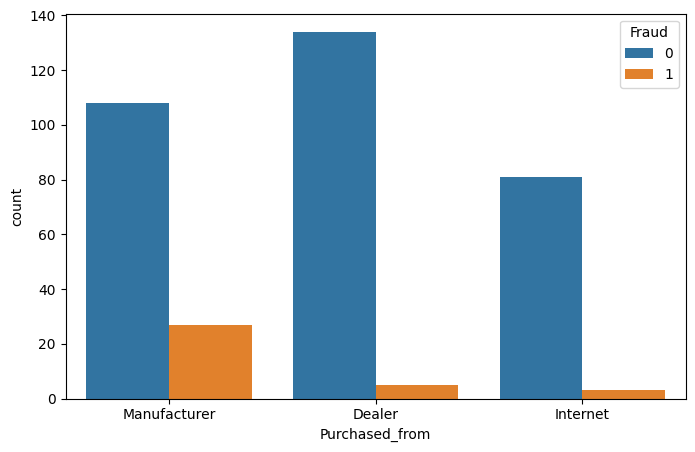

In [34]:
#Relationship between Purchased from ('Dealer', 'Manufacturer', 'Internet') and whether Fraud occured
plt.figure(figsize=(8, 5))
sns.countplot(x='Purchased_from', hue='Fraud', data=data)

plt.show()

From the above graph, we can conclude that non-fraudulent warranty claims are highest for products purchased from dealers, while products purchased directly from manufacturers show the highest incidence of fraudulent warranty claims compared to those purchased from the internet or dealers. Additionally, products bought online have the fewest overall warranty claims, both fraudulent and non-fraudulent.

**#Examining Purpose**

In [35]:
# Unique Values
data['Purpose'].unique()

array(['Complaint', 'Claim', 'Other'], dtype=object)

In [36]:
# Value Count
data['Purpose'].value_counts()

,count
Purpose,
Claim,171
Complaint,146
Other,41


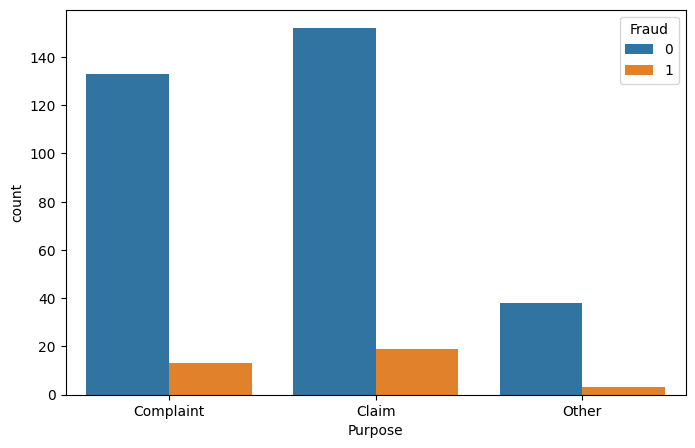

In [37]:
#Relationship between Purpose from ('Claim', 'Complaint', 'Other') and whether Fraud occured
plt.figure(figsize=(8, 5))
sns.countplot(x='Purpose', hue='Fraud', data=data)

plt.show()

Based on the graph, we can conclude that individuals whose purpose is to claim a warranty for a product have the highest likelihood of submitting a fraudulent warranty claim compared to those whose purpose is a complaint or other reasons. Non-fraudulent claims are also most frequent for warranty claims. Complaint-related claims have the second-highest number of both fraudulent and non-fraudulent claims, while claims for other purposes account for the fewest overall.

**Analyzing "Service_Centre" Column**

In [38]:


data['Service_Centre'].describe()

,Service_Centre
count,358.000000
mean,12.812849
std,1.766844
min,10.000000
25%,12.000000
50%,13.000000
75%,15.000000
max,16.000000


In [39]:
# Unique Values
data['Service_Centre'].unique()

array([10, 12, 14, 16, 15, 13, 11])

<ipython-input-40-29bbafca3995>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Service_Centre', data=data, palette='viridis')
<ipython-input-40-29bbafca3995>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


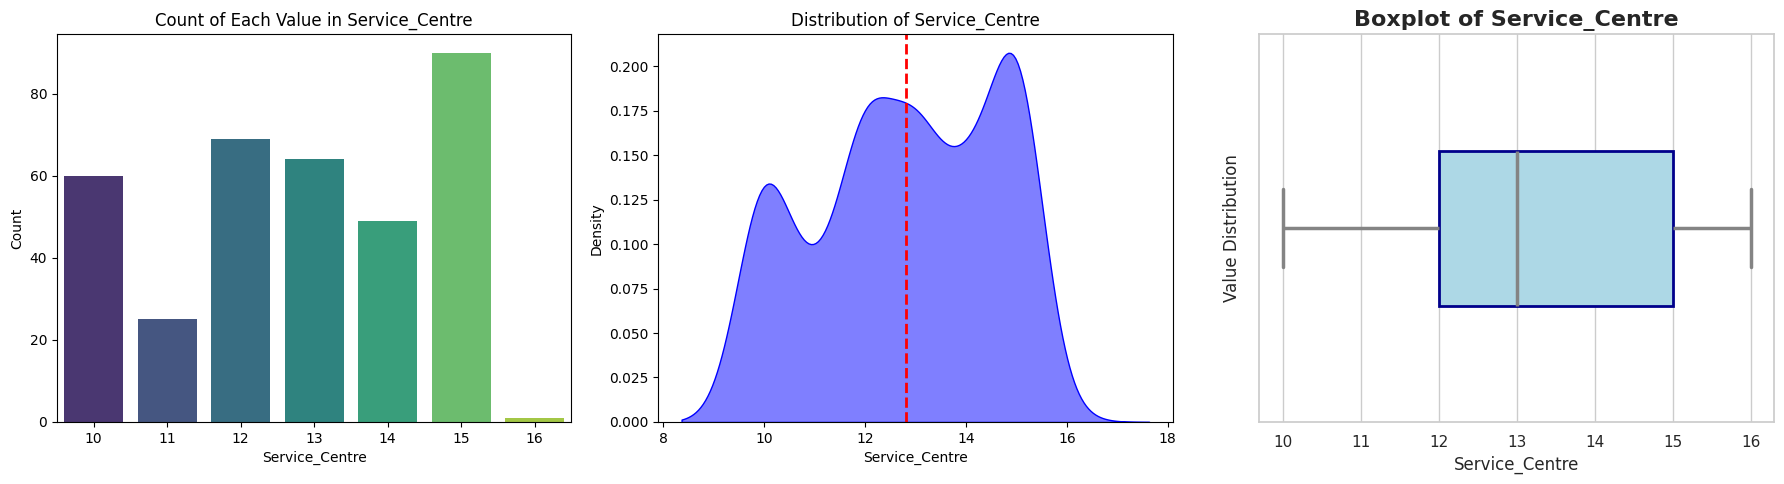

In [40]:
#Checking the distribution of Service_Centre column

plt.figure(figsize=(18,5))
plt.subplot(1, 3, 1)
sns.countplot(x='Service_Centre', data=data, palette='viridis')
plt.title('Count of Each Value in Service_Centre')
plt.xlabel('Service_Centre')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.kdeplot(data['Service_Centre'], fill=True, color='blue', alpha=0.5)
plt.axvline(data['Service_Centre'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.title('Distribution of Service_Centre')
plt.xlabel('Service_Centre')
plt.ylabel('Density')



sns.set(style="whitegrid")
plt.subplot(1, 3, 3)

sns.boxplot(
    x='Service_Centre',
    data=data,
    palette="coolwarm",  # Custom color palette
    linewidth=2.5,  # Line thickness
    width=0.4,  # Width of the box
    fliersize=7,  # Size of the outliers
    boxprops=dict(facecolor='lightblue', edgecolor='darkblue', linewidth=2)
)

# Customize the plot title and labels
plt.title('Boxplot of Service_Centre', fontsize=16, weight='bold')
plt.xlabel('Service_Centre', fontsize=12)
plt.ylabel('Value Distribution', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()





*   The service centres 12, 13, 14, and especially 15 have higher case counts compared to others, with Centre 15 being the most active.
Centre 11 shows the lowest count among the main service centres.
The density plot also indicates that Centre 15 has the highest peak, representing the highest concentration of cases. The distribution is uneven, with Centres 10 and 11 having noticeably fewer cases.
*   The boxplot shows that the majority of data is concentrated between Service Centres 12 and 15, with Centre 13 appearing around the median value.It does not show any outliers in Service Centre





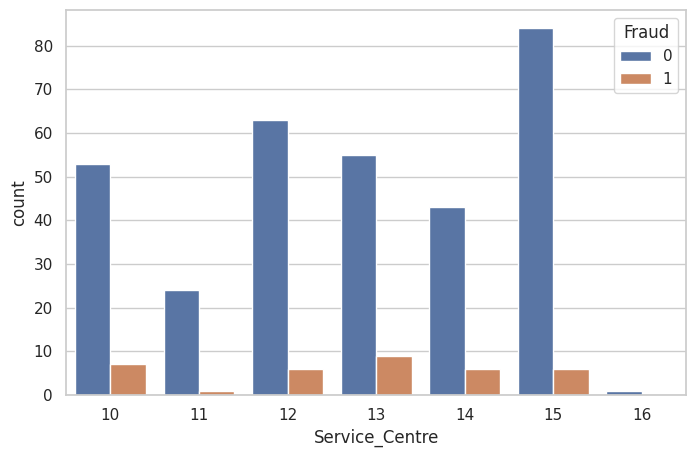

In [41]:
# Relationship between Service_Centre and whether Fraud occured
plt.figure(figsize=(8, 5))
sns.countplot(x='Service_Centre', hue='Fraud', data=data)

plt.show()


*   Non-fraudulent cases vastly outnumber fraudulent ones across all service centres.
Service Centre 15 has the highest count of both fraud and non-fraud cases.
While fraud cases exist in all service centres, they represent only a small proportion, with no significant spikes in fraud across any particular centre.


**Analyzing ''Product_Age'' Column**

In [42]:

data['Product_Age'].describe()

,Product_Age
count,358.000000
mean,201.843575
std,259.731564
min,3.000000
25%,14.000000
50%,60.000000
75%,303.750000
max,991.000000


In [43]:
# Totalnumber of Unique values in Product_Age
print(f"Total number of Unique values : ",data['Product_Age'].nunique())

Total number of Unique values :  188


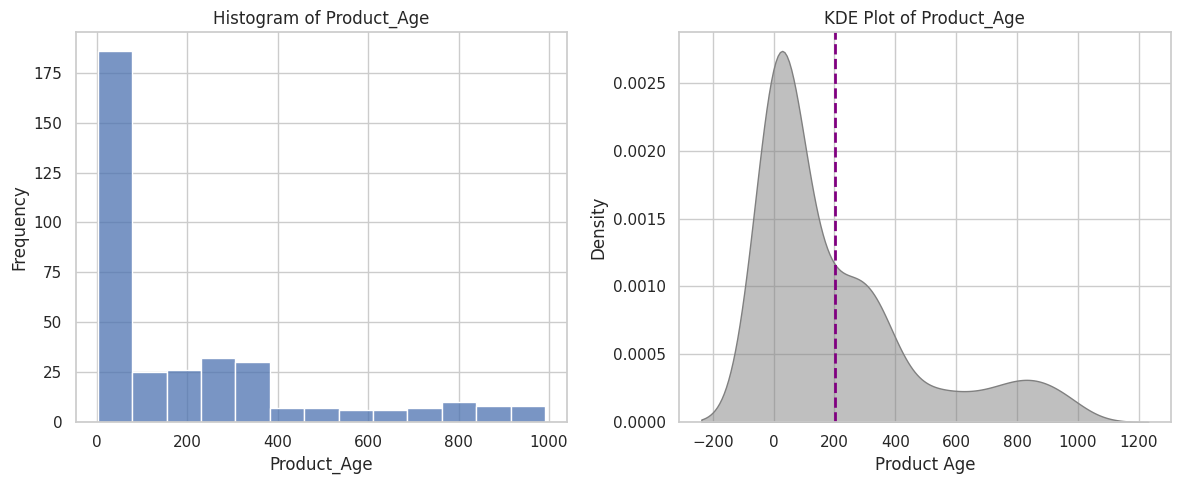

In [44]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)


sns.histplot(data['Product_Age'])
plt.title('Histogram of Product_Age')
plt.xlabel('Product_Age')
plt.ylabel('Frequency')


plt.subplot(1,3,2)
sns.kdeplot(data['Product_Age'], fill=True, color='grey', alpha=0.5)
plt.axvline(data['Product_Age'].mean(), color='purple', linestyle='dashed', linewidth=2)
plt.title('KDE Plot of Product_Age')
plt.xlabel('Product Age')
plt.ylabel('Density')
plt.tight_layout()
plt.show()








**1.   Histogram Analysis:**



*   The histogram shows that the majority of products are clustered at a relatively low age, with a large concentration of products aged between 0 and 200.
*   There are fewer products with higher ages, and the distribution shows a right skewness (positive skew), with some products having an age over 600, but those are relatively rare.



**2.   KDE Plot (Kernel Density Estimation):**


*  The KDE plot reinforces the observation from the histogram. There is a sharp peak in the distribution around 0 to 200 for product age, indicating that most products are relatively young.


*   
The dashed vertical line on the KDE plot might indicate the mean or a threshold age of significance, which appears to be around 200. Most of the density is concentrated before this point.


*  The density decreases rapidly as the age increases, and the tail extends beyond 600, showing the presence of a few older products.





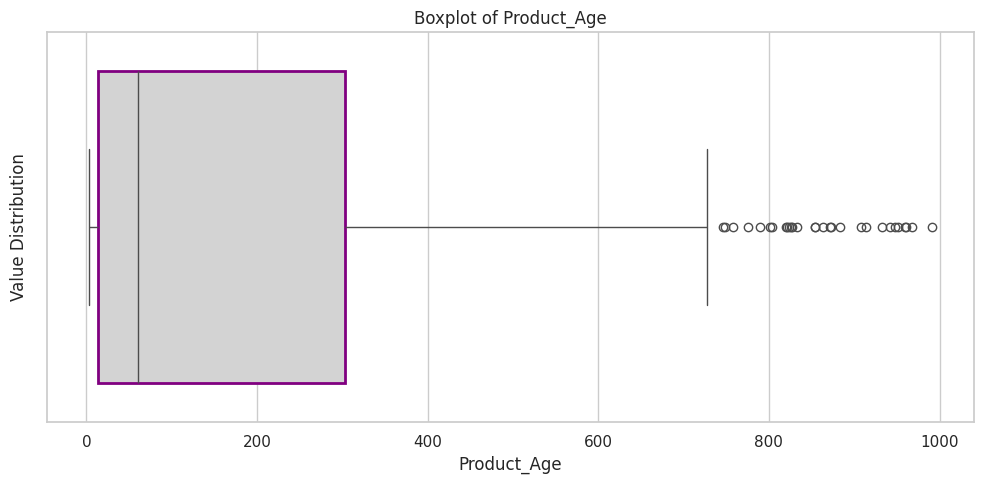

<Figure size 640x480 with 0 Axes>

In [45]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.boxplot(
    x='Product_Age',
    data=data,
    boxprops=dict(facecolor='lightgrey', edgecolor='purple', linewidth=2)
)
plt.title('Boxplot of Product_Age')
plt.xlabel('Product_Age')
plt.ylabel('Value Distribution')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()



*   The boxplot shows the spread of product ages, where the interquartile range (IQR) is mostly concentrated between 0 and approximately 300, suggesting that 50% of the data lies within this range.

*   The presence of several outliers beyond 600 can be observed, which aligns with the skewness observed in the histogram and KDE plot.





#Detecting and treating outliers in "Product_Age."

To detect outliers in "Product_Age" with greater accuracy, we will employ the Isolation Forest model.

In [46]:
# Isolation Forest for Outlier Detection
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the Isolation Forest model on the Product_Age column
data['outlier'] = iso_forest.fit_predict(data[['Product_Age']])

# The model assigns -1 to outliers and 1 to inliers
# Detect the outliers
outliers = data[data['outlier'] == -1]
inliers = data[data['outlier'] == 1]

# Display the results
print("Outliers:")
outliers.sort_values(by='Product_Age',ascending=True)



Outliers:


,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,...,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud,outlier
117,West,Gujarat,Rural,Ahmedabad,Personal,Household,AC,0,1,0,...,0,0,7153.0,14,444,Dealer,30.0,Other,0,-1
169,West,Gujarat,Urban,Ahmedabad,Personal,Entertainment,TV,0,0,0,...,1,1,4000.0,15,609,Internet,5.0,Claim,0,-1
103,East,Bihar,Urban,Patna,Personal,Entertainment,TV,0,0,0,...,1,0,2856.0,11,625,Internet,8.0,Other,0,-1
142,West,Maharashtra,Rural,Mumbai,Business,Entertainment,TV,0,0,0,...,2,1,4216.0,11,626,Internet,30.0,Complaint,0,-1
168,West,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,0,0,0,...,1,0,4216.0,10,672,Dealer,25.0,Other,0,-1
126,West,Gujarat,Rural,Ahmedabad,Personal,Household,AC,2,0,1,...,0,0,5652.0,10,758,Dealer,30.0,Claim,0,-1
146,South,Karnataka,Rural,Bangalore,Personal,Entertainment,TV,0,0,0,...,1,1,5465.0,12,776,Internet,24.0,Claim,0,-1
170,East,West Bengal,Urban,Kolkata,Business,Entertainment,TV,0,0,0,...,2,1,5283.0,11,883,Dealer,12.0,Claim,0,-1
83,South West,other_states,Rural,Panaji,Business,Entertainment,TV,0,0,0,...,2,1,6610.0,14,908,Dealer,30.0,Complaint,0,-1
133,West,Maharashtra,Rural,Mumbai,Business,Household,AC,0,0,1,...,0,0,5418.0,14,914,Internet,30.0,Claim,0,-1


The Isolation Forest model has identified 18 data points in the "Product_Age" column as outliers, with product ages of 444 and above classified as outliers by the model.

In [47]:
# Replacing product ages equal to or greater than 444 with the mean value of the "Product_Age" column.
data['Product_Age'] = np.where(data['Product_Age'] >= 444, data['Product_Age'].mean(), data['Product_Age'])



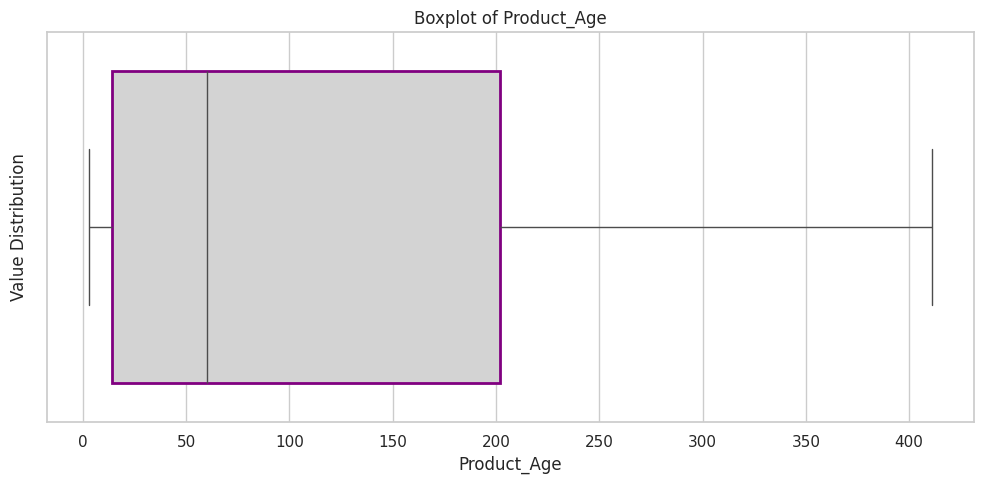

<Figure size 640x480 with 0 Axes>

In [48]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.boxplot(
    x='Product_Age',
    data=data,
    boxprops=dict(facecolor='lightgrey', edgecolor='purple', linewidth=2)
)
plt.title('Boxplot of Product_Age')
plt.xlabel('Product_Age')
plt.ylabel('Value Distribution')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

After replacing the outliers detected by the Isolation Forest with the mean of the "Product_Age" column, the above box plot indicates that there are no remaining outliers in the "Product_Age" column.

In [49]:
#Droping Outliers Column
data.drop('outlier',axis=1,inplace=True)

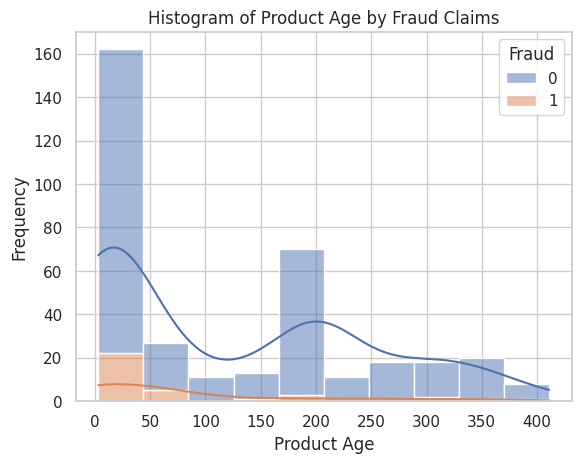

In [50]:
# Visualizing the relationship between product age and the probability of a warranty claim being fraudulent

sns.histplot(data, x='Product_Age', hue='Fraud', multiple='stack', kde=True)
plt.title('Histogram of Product Age by Fraud Claims')
plt.xlabel('Product Age')
plt.ylabel('Frequency')
plt.show()


Fraudulent claims are more frequent when the product is relatively new, though they are far fewer than non-fraudulent claims across all product ages.

Non-fraudulent claims dominate across all product ages, but are especially concentrated in the early stages of product life.

The declining trend in both fraudulent and non-fraudulent claims as the product ages could indicate a relationship between product wear and reduced warranty activity.

**Analyzing Call_details Column**

In [51]:
# Call Details
data['Call_details'].describe()


,Call_details
count,358.000000
mean,11.931844
std,11.559474
min,0.500000
25%,1.600000
50%,6.500000
75%,23.000000
max,30.000000


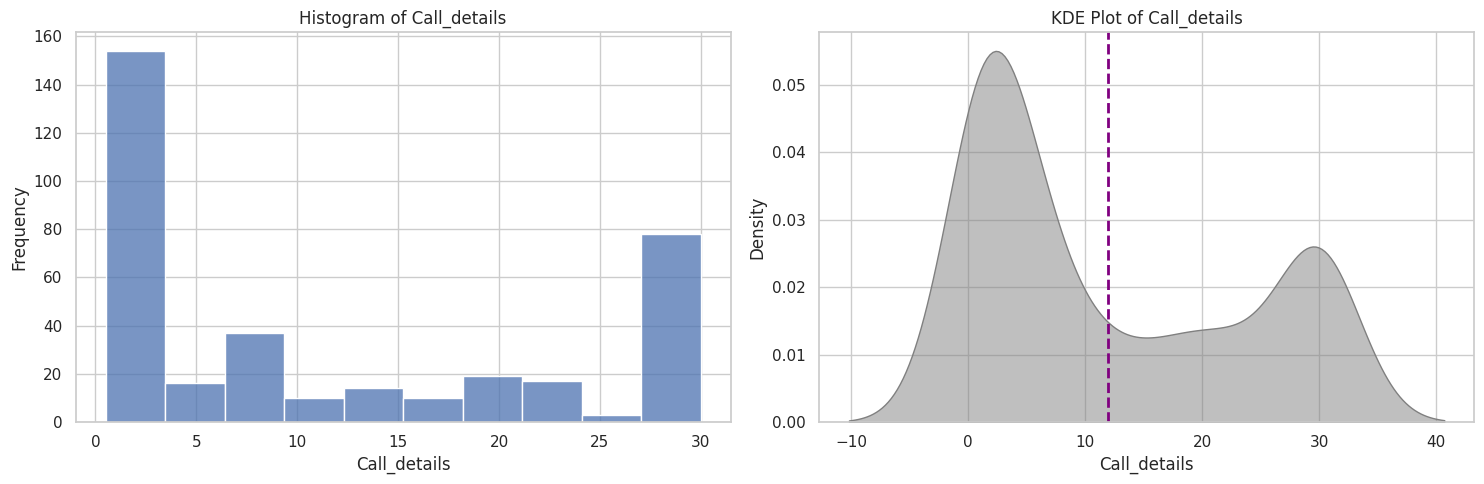

In [52]:
# Visualizing Call_details

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data['Call_details'])
plt.title('Histogram of Call_details')
plt.xlabel('Call_details')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.kdeplot(data['Call_details'], fill=True, color='grey', alpha=0.5)
plt.axvline(data['Call_details'].mean(), color='purple', linestyle='dashed', linewidth=2)
plt.title('KDE Plot of Call_details')
plt.xlabel('Call_details')
plt.ylabel('Density')
plt.tight_layout()
plt.show()




The data shows a multimodal distribution with two clusters. Most data points are concentrated between 0 and 5, with a second spike around 30.

There are fewer occurrences between 10 and 20, creating a dip.

The density plot confirms two peaks at 0 and 30, with a higher density at the lower range (0–10), a dip in the middle, and a rise again near 30. This suggests two main clusters of call details at the low and high ends.

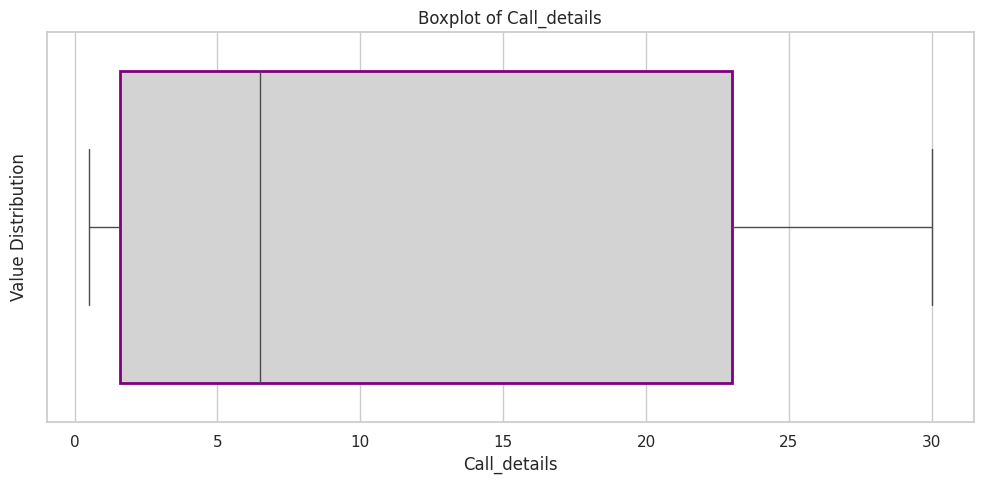

In [53]:
# Boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(
    x='Call_details',
    data=data,
    boxprops=dict(facecolor='lightgrey', edgecolor='purple', linewidth=2)
)
plt.title('Boxplot of Call_details')
plt.xlabel('Call_details')
plt.ylabel('Value Distribution')
plt.tight_layout()
plt.show()


The median value for "Call_details" is around 10.

The interquartile range (IQR) extends from around 5 to 20, indicating that 50% of the data lies within this range.

The spread of the data is quite large, with the whiskers extending from 0 to about 25.

<ipython-input-54-92d74c7b9993>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_stats.index, y=region_stats.values, palette='viridis') # Pass x and y as named arguments.


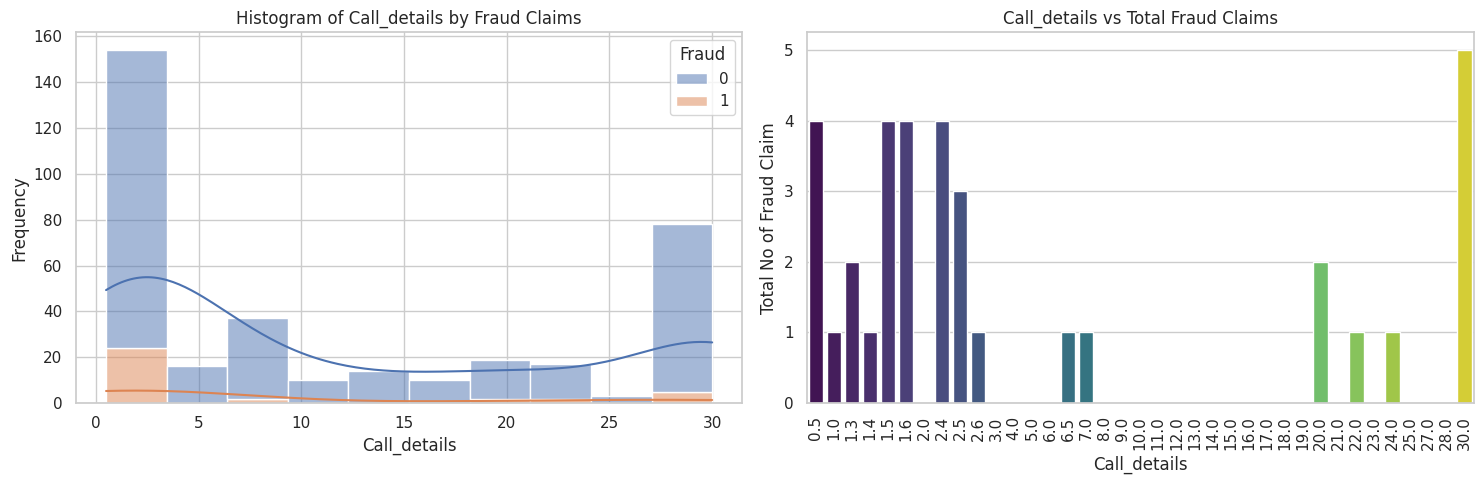

In [54]:
# Visualizing the relationship between Call_details and the probability of a warranty claim being fraudulentl

plt.figure(figsize=(15, 5))
plt.subplot(1, 2 ,1)

sns.histplot(data, x='Call_details', hue='Fraud', multiple='stack', kde=True)

# Adding labels and title
plt.title('Histogram of Call_details by Fraud Claims')
plt.xlabel('Call_details')
plt.ylabel('Frequency')

plt.subplot(1, 2 ,2)
region_stats=data.groupby('Call_details')['Fraud'].agg('sum')
sns.barplot(x=region_stats.index, y=region_stats.values, palette='viridis') # Pass x and y as named arguments.
plt.title('Call_details vs Total Fraud Claims')
plt.xlabel('Call_details')
plt.ylabel('Total No of Fraud Claim')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Fraud claims are predominantly associated with lower call details (1–5) and then another peak at 30 calls.

This suggests potential patterns of fraudulent behavior in cases with a low number of calls and another group with a high number of calls.

**Analyzing "Claim_Value"**

In [55]:
#Total Number of Unique Values in Column
print(f"Total number of Unique values : ",data['Claim_Value'].nunique())

Total number of Unique values :  107


In [56]:
data['Claim_Value'].describe()

,Claim_Value
count,358.000000
mean,11994.534916
std,12063.213579
min,0.000000
25%,4006.000000
50%,7194.000000
75%,15000.000000
max,50000.000000


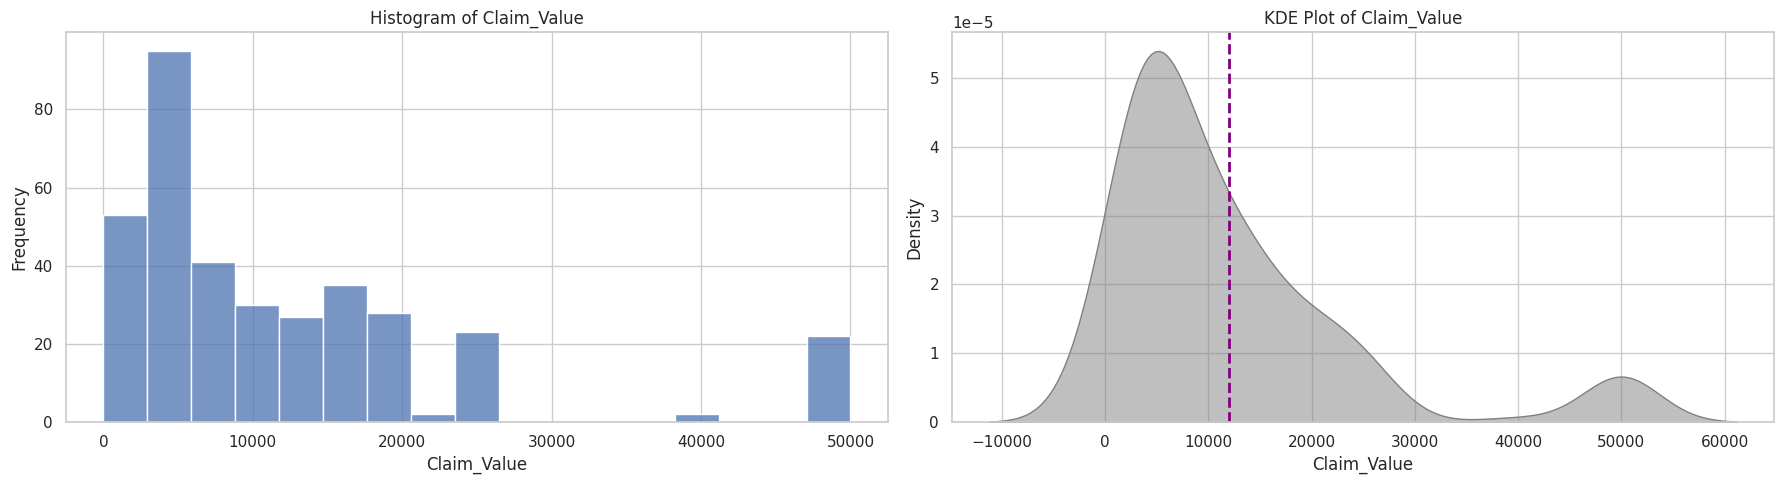

In [57]:
#Visulazing Claim_Value

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)


sns.histplot(data['Claim_Value'])
plt.title('Histogram of Claim_Value')
plt.xlabel('Claim_Value')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.kdeplot(data['Claim_Value'], fill=True, color='grey', alpha=0.5)
plt.axvline(data['Claim_Value'].mean(), color='purple', linestyle='dashed', linewidth=2)
plt.title('KDE Plot of Claim_Value')
plt.xlabel('Claim_Value')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

The majority of claims fall in the 6000-8000 range, as seen in both the histogram and the KDE plot.

There is a notable concentration of claims just under 10,000, suggesting this could be a common claim value threshold or cap.

While higher claim values (over 15,000) are less frequent, they still appear regularly and should not be ignored in any analysis.

The presence of distinct peaks suggests that claim values may follow certain patterns, possibly related to specific products, service levels, or other factors influencing the claim value.

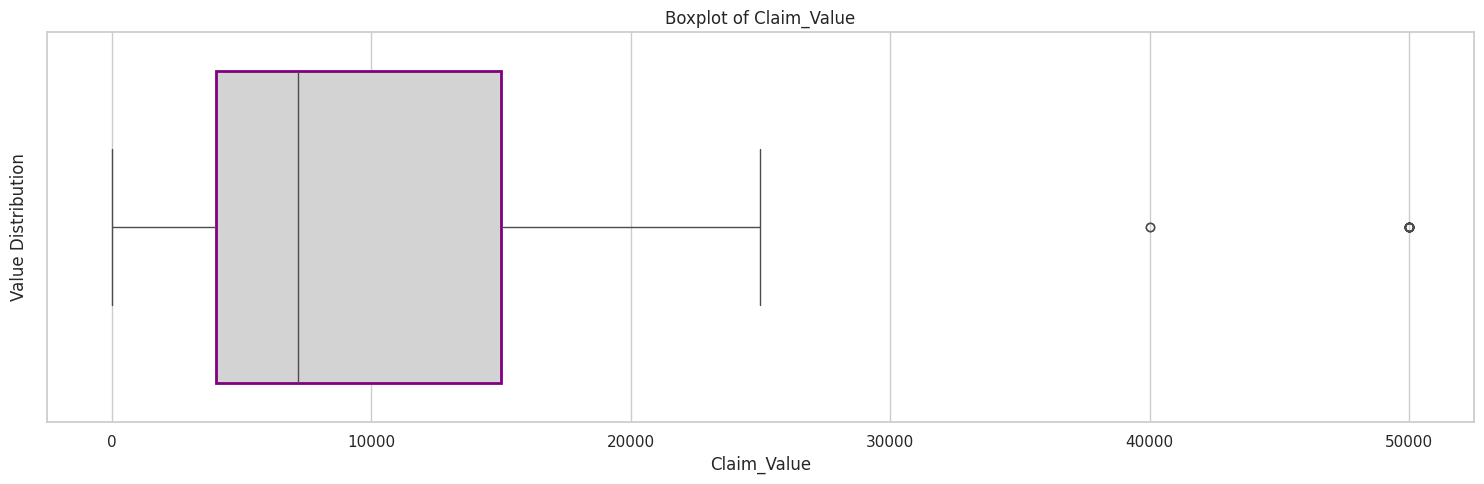

In [58]:
#Boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
sns.boxplot(
    x='Claim_Value',
    data=data,
    boxprops=dict(facecolor='lightgrey', edgecolor='purple', linewidth=2)
)
plt.title('Boxplot of Claim_Value')
plt.xlabel('Claim_Value')
plt.ylabel('Value Distribution')
plt.tight_layout()
plt.show()

The middle 50% of the data (the interquartile range, or IQR) lies between roughly 6000 and 12000.

The median claim value is around 8000, indicating that half of the data points are below this value.

The whiskers extend from approximately 4000 to 18000, showing the overall spread of the data.

There is an outlier at 20000, indicating a claim value significantly higher than the rest of the data.

**Treating the Outlier**

To detect outliers in "Product_Age" with greater accuracy, we will employ the Isolation Forest model.


In [59]:
# Isolation Forest for Outlier Detection
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the Isolation Forest model on the Product_Age column
data['outlier'] = iso_forest.fit_predict(data[['Claim_Value']])

# The model assigns -1 to outliers and 1 to inliers
# Detect the outliers
outliers = data[data['outlier'] == -1]
inliers = data[data['outlier'] == 1]

# Display the results
print("Outliers:")
outliers.sort_values(by='Claim_Value',ascending=True)



Outliers:


,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,...,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud,outlier
2,North,other_states,Urban,Chandigarh,Personal,Household,AC,0,1,2,...,0,0,18000.0,14,10.0,Dealer,1.4,Claim,0,-1
23,South West,Tamil Nadu,Rural,Chennai,Business,Entertainment,TV,0,0,0,...,1,1,21000.0,13,4.0,Internet,2.5,Complaint,0,-1
67,South West,Tamil Nadu,Rural,Chennai,Business,Entertainment,TV,0,0,0,...,2,1,21000.0,13,4.0,Internet,2.5,Complaint,0,-1
32,South,Bihar,Urban,Purnea,Business,Entertainment,TV,0,0,0,...,1,0,40000.0,10,14.0,Manufacturer,1.5,Claim,1,-1
73,South,Bihar,Urban,Purnea,Business,Entertainment,TV,0,0,0,...,1,0,40000.0,10,14.0,Manufacturer,1.5,Claim,0,-1


In [60]:
outliers.shape

(5, 21)

The Isolation Forest model has identified 18 data points in the "Claim_Value" column as outliers

In [61]:
#  Replacing Claim Values equal to or greater than 18000.0 with the mean value of the "Claim_Value" column.
data['Claim_Value'] = np.where(data['Claim_Value'] >= 18000.0, data['Claim_Value'].mean(), data['Claim_Value'])


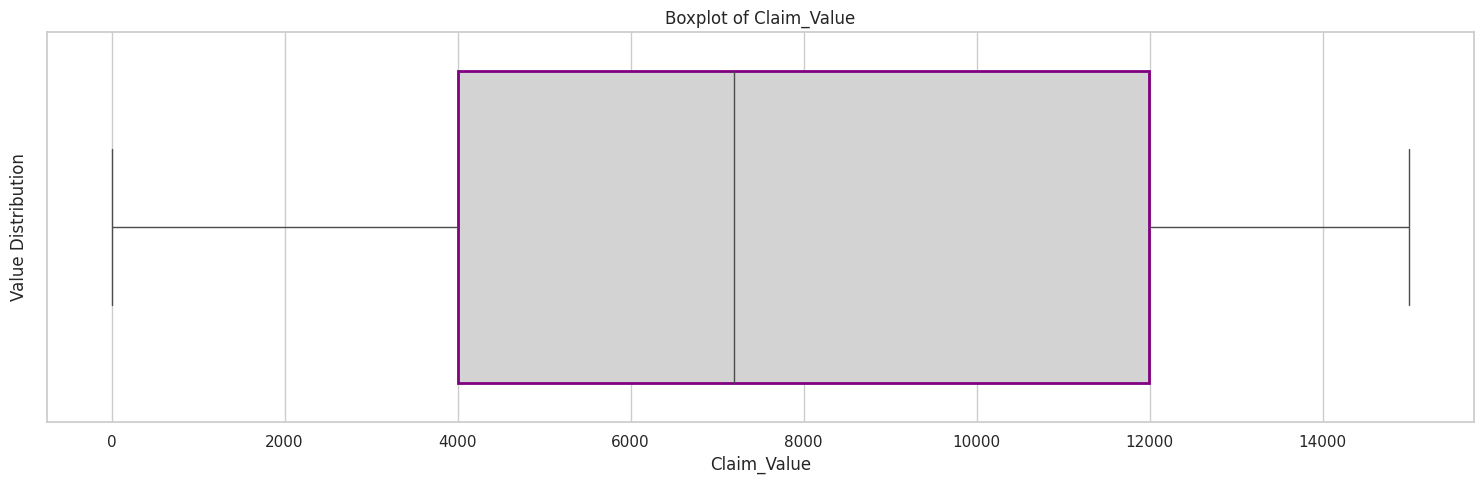

In [62]:
# Boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
sns.boxplot(
    x='Claim_Value',
    data=data,
    boxprops=dict(facecolor='lightgrey', edgecolor='purple', linewidth=2)
)
plt.title('Boxplot of Claim_Value')
plt.xlabel('Claim_Value')
plt.ylabel('Value Distribution')
plt.tight_layout()
plt.show()

After replacing the outliers detected by the Isolation Forest with the mean of the "Claim_Value" column, the above box plot indicates that there are no remaining outliers in the "Claim_Value" column.

In [63]:
# Droping Outlier Column
data.drop('outlier',axis=1,inplace=True)
data.columns

Index(['Region', 'State', 'Area', 'City', 'Consumer_profile',
       'Product_category', 'Product_type', 'AC_1001_Issue', 'AC_1002_Issue',
       'AC_1003_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue',
       'Claim_Value', 'Service_Centre', 'Product_Age', 'Purchased_from',
       'Call_details', 'Purpose', 'Fraud'],
      dtype='object')

 **Converting the object-type columns in the dataset to numerical columns using One-Hot Encoding.**

In [64]:
# Converting the object-type columns in the dataset to numerical columns using One-Hot Encoding.

data=pd.get_dummies(data,drop_first=True)
data.columns

Index(['AC_1001_Issue', 'AC_1002_Issue', 'AC_1003_Issue', 'TV_2001_Issue',
       'TV_2002_Issue', 'TV_2003_Issue', 'Claim_Value', 'Service_Centre',
       'Product_Age', 'Call_details', 'Fraud', 'Region_North',
       'Region_North East', 'Region_North West', 'Region_South',
       'Region_South East', 'Region_South West', 'Region_West', 'State_Bihar',
       'State_Delhi', 'State_Gujarat', 'State_Karnataka', 'State_Kerala',
       'State_Maharashtra', 'State_Orissa', 'State_Tamil Nadu',
       'State_Uttar Pradesh', 'State_West Bengal', 'State_other_states',
       'Area_Urban', 'City_Ahmedabad', 'City_Bangalore', 'City_Bhopal',
       'City_Bhubaneswar', 'City_Chandigarh', 'City_Chennai', 'City_Delhi',
       'City_Guwhati', 'City_Hyderabad', 'City_Jaipur', 'City_Kochi',
       'City_Kolkata', 'City_Lucknow', 'City_Meerut', 'City_Mumbai',
       'City_New Delhi', 'City_Panaji', 'City_Patna', 'City_Pune',
       'City_Purnea', 'City_Ranchi', 'City_Shimla', 'City_Srinagar',
       'Ci

In [65]:
# making the Copy of DataSet
data3=data.copy()

*Since our dataset remains imbalanced, we will first train the model on this imbalanced data to evaluate its accuracy and assess how well it predicts both the positive and negative classes.*

In [66]:
# Splitting the imbalanced dataset using the train-test split3

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data3.drop('Fraud',axis=1),data3.Fraud,test_size=0.20,random_state=42)

**Utilizing GridSearchCV to identify the optimal model while simultaneously determining the best parameters for each respective model**

In [67]:
# Model Building

In [68]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def get_best_model(X_train, X_test, y_train, y_test):
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(max_iter=10000),
            'params': {
                'solver': ['lbfgs', 'liblinear']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ['gini', 'entropy']
            }
        },
        'Gaussian Naive Bayes': {
            'model': GaussianNB(),
            'params': {
                'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(),
            'params': {
                'criterion': ['gini', 'entropy']
            }
        },
        'SVM': {
            'model': SVC(C=1),
            'params': {
                'gamma': ['auto', 'scale']
            }
        }
    }

    results = []

    for model_name, config in models.items():
        # Perform GridSearchCV
        gs = GridSearchCV(config['model'], config['params'], cv=5, n_jobs=-1)
        gs.fit(X_train, y_train)

        # Store results
        results.append({
            'Model': model_name,
            'Best Cross-Validation Score': gs.best_score_,
            'Best Parameters': gs.best_params_,
            'Test Accuracy': gs.score(X_test, y_test)
        })

    # Convert the results into a DataFrame for better readability
    results_df = pd.DataFrame(results, columns=['Model', 'Best Cross-Validation Score', 'Best Parameters', 'Test Accuracy'])
    return results_df



### ANN

In [69]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import classification_report

def neural_network(X_train, X_test, y_train, y_test):
    # Define the neural network architecture
    model = keras.Sequential([
        keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Compile the model with optimizer, loss, and metrics
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model, with validation data for tracking performance during training
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

    # Predict on the test set
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds).astype(int)  # Round to get binary classification labels (0 or 1)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)

    # Print the test accuracy and loss
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Print classification report
    print("Classification Report:\n", classification_report(y_test, y_preds))

    return y_preds, history

# Example usage:
# y_predictions, model_history = neural_network(X_train, X_test, y_train, y_test)


**function that generates a comprehensive report detailing the performance metrics of a classification model**

In [70]:
import warnings
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

def class_report(X_train,X_test,y_train,y_test):
    pipelines = []
    pipelines.append(('Logistic', Pipeline([('Logistic' , LogisticRegression(solver= 'lbfgs',max_iter=10000))])))
    pipelines.append(('Tree' , Pipeline([('Tree' ,DecisionTreeClassifier(criterion='gini'))])))
    pipelines.append(('nive_bays',Pipeline([('nive_bays',GaussianNB(var_smoothing= 0.01))])))
    pipelines.append(('Forest',Pipeline([('Forest',RandomForestClassifier(criterion='gini'))])))
    pipelines.append(('SVM', Pipeline([('SVM',SVC(C= 1))])))


    for name, model in pipelines:
        result = cross_val_score(model, X_train, y_train)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred))
        msg = "%s: %f (%f)" % (name, result.mean(), result.std())
        print(msg)


## Examining how different models perform when applied to imbalanced datasets

In [71]:
get_best_model(X_train,X_test,y_train,y_test)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


,Model,Best Cross-Validation Score,Best Parameters,Test Accuracy
0,Logistic Regression,0.881186,{'solver': 'lbfgs'},0.930556
1,Decision Tree,0.832426,{'criterion': 'entropy'},0.861111
2,Gaussian Naive Bayes,0.895100,{'var_smoothing': 0.01},0.930556
3,Random Forest,0.870780,{'criterion': 'gini'},0.902778
4,SVM,0.895100,{'gamma': 'auto'},0.930556


From the table above, we can observe that the models "Logistic Regression" using the lbfgs solver, "Gaussian Naive Bayes" with a var_smoothing parameter of 0.01, and "Support Vector Machine" with a gamma value of 'auto' all achieve the same impressive accuracy of 0.93. In contrast, the "Random Forest" model, employing the Gini criterion, achieves an accuracy of 0.90. However, we now need to examine whether these models are predicting both classes with equal proficiency.

**Classification Reports of all models**

In [72]:
class_report(X_train,X_test,y_train,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        67
           1       0.00      0.00      0.00         5

    accuracy                           0.93        72
   macro avg       0.47      0.50      0.48        72
weighted avg       0.87      0.93      0.90        72

Logistic: 0.870659 (0.013702)
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        67
           1       0.17      0.40      0.24         5

    accuracy                           0.82        72
   macro avg       0.56      0.63      0.57        72
weighted avg       0.90      0.82      0.85        72

Tree: 0.818391 (0.034654)
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        67
           1       0.00      0.00      0.00         5

    accuracy                           0.93        72
   macro avg       0.47      0.50      0.48        72
weighted avg      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Implementation of ANN**

In [73]:
imbalance=neural_network(X_train,X_test,y_train,y_test)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7973 - loss: 17.4536 - val_accuracy: 0.7759 - val_loss: 6.0444
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7487 - loss: 10.4095 - val_accuracy: 0.4483 - val_loss: 3.5013
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6032 - loss: 3.1528 - val_accuracy: 0.9138 - val_loss: 5.8122
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8774 - loss: 10.8317 - val_accuracy: 0.9138 - val_loss: 1.9717
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9044 - loss: 6.4435 - val_accuracy: 0.9138 - val_loss: 3.2918
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7041 - loss: 7.5237 - val_accuracy: 0.9138 - val_loss: 7.3134
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8595 - loss: 13.8100 - val_accuracy: 0.9138 - val_loss: 1.7955
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8994 - loss: 5.4431 - val_accuracy: 0.9138 - val_loss: 2.2159
Epoch 9/50
8/8

*Despite models such as Logistic Regression, Gaussian Naive Bayes, and Support Vector Machine demonstrating the highest accuracy, the classification report reveals a common failure across all models to predict class 1. With a precision score of 0 for class 1, the models are entirely ineffective at identifying fraudulent claims. To address this issue, it is essential to balance the dataset for improved prediction performance.*

****Balancing the Data****

We will use **Under-sampling**, **Over-sampling**, and **SMOTE** to balance the dataset and select the best sampling technique based on accuracy and precision

### Under_Sampling

Under Sampling works by randomly removing instances from the majority class until its size is comparable to the minority class. This helps models avoid bias toward the majority class and improves performance on the minority class

In [74]:
data_0=data3[data3['Fraud']==0]
data_1=data3[data3['Fraud']==1]

In [75]:
data_0.Fraud.value_counts(),data_1.Fraud.value_counts()

(Fraud
 0    323
 Name: count, dtype: int64,
 Fraud
 1    35
 Name: count, dtype: int64)

**RandomUnderSampler** to perform undersampling of the data

In [76]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_under, y_under = undersample.fit_resample(data3.drop('Fraud',axis=1), data3.Fraud)
data_under = pd.concat([X_under, y_under], axis=1)
print('Random under-sampling:')
print(data_under.Fraud.value_counts())


Random under-sampling:
Fraud
0    35
1    35
Name: count, dtype: int64


In [77]:
#splitting independent and dependent variables of Under samppled data
X=data_under.drop('Fraud',axis=1)
Y=data_under.Fraud

In [78]:
# spliting x and y into training and testing set
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X,Y,test_size=0.25,random_state=10, stratify=Y)

In [79]:
y_train_1.value_counts()

,count
Fraud,
1,26
0,26


In [80]:
y_test_1.value_counts()

,count
Fraud,
0,9
1,9


In [81]:
get_best_model(X_train_1,X_test_1,y_train_1,y_test_1)

,Model,Best Cross-Validation Score,Best Parameters,Test Accuracy
0,Logistic Regression,0.500000,{'solver': 'liblinear'},0.611111
1,Decision Tree,0.476364,{'criterion': 'gini'},0.388889
2,Gaussian Naive Bayes,0.654545,{'var_smoothing': 1e-14},0.388889
3,Random Forest,0.518182,{'criterion': 'gini'},0.555556
4,SVM,0.592727,{'gamma': 'scale'},0.833333


Now, we observe decrease in model accuracy compared to the unsampled data, with SVM achieving the highest accuracy at 0.83, followed by Logistic Regression with 0.61. To further evaluate model performance, we will examine the precision to assess how well each model predicts both classes (0 and 1) after under-sampling.

In [82]:
class_report(X_train_1,X_test_1,y_train_1,y_test_1)

              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.58      0.78      0.67         9

    accuracy                           0.61        18
   macro avg       0.62      0.61      0.60        18
weighted avg       0.62      0.61      0.60        18

Logistic: 0.481818 (0.128436)
              precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.50      0.44      0.47         9

    accuracy                           0.50        18
   macro avg       0.50      0.50      0.50        18
weighted avg       0.50      0.50      0.50        18

Tree: 0.476364 (0.116506)
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.80      0.89      0.84         9

    accuracy                           0.83        18
   macro avg       0.84      0.83      0.83        18
weighted avg      

In [83]:
under_sampeling=neural_network(X_train_1,X_test_1,y_train_1,y_test_1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.5498 - loss: 299.5014 - val_accuracy: 0.4545 - val_loss: 192.3109
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5185 - loss: 181.9867 - val_accuracy: 0.4545 - val_loss: 41.9362
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5511 - loss: 33.9852 - val_accuracy: 0.5455 - val_loss: 115.3601
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5081 - loss: 117.8012 - val_accuracy: 0.5455 - val_loss: 156.0086
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5185 - loss: 148.7283 - val_accuracy: 0.5455 - val_loss: 121.9629
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5290 - loss: 113.0814 - val_accuracy: 0.4545 - val_loss: 43.4375
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4060 - loss: 41.7010 - val_accuracy: 0.4545 - val_loss: 32.8555
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5498 - loss: 32.7576 - val_accuracy: 0.4545 - val

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification report indicates that the models are now predicting both classes with equal precision, eliminating bias between them. But the overall . However, ANN continues to perform poorly.

### Over Sampling

Over Sampling increases the number of samples in the minority class. It works by duplicating existing minority class instances

In [84]:
data_0_=data3[data3['Fraud']==0]
data_1_=data3[data3['Fraud']==1]

In [85]:
data_0_.Fraud.value_counts(),data_1_.Fraud.value_counts()

(Fraud
 0    323
 Name: count, dtype: int64,
 Fraud
 1    35
 Name: count, dtype: int64)

**RandomOverSampler** to perform the over sampling of data

In [86]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_over, y_over = oversample.fit_resample(data3.drop('Fraud',axis=1), data3.Fraud)
data_test_over = pd.concat([X_over, y_over], axis=1)
print('Random over-sampling:')
print(data_test_over.Fraud.value_counts())

Random over-sampling:
Fraud
1    323
0    323
Name: count, dtype: int64


In [87]:
# spliting over sampled data in training and testing set

X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(data_test_over.drop('Fraud',axis=1),data_test_over.Fraud,test_size=0.25,random_state=10)

In [88]:
get_best_model(X_train_2,X_test_2,y_train_2,y_test_2)

,Model,Best Cross-Validation Score,Best Parameters,Test Accuracy
0,Logistic Regression,0.797487,{'solver': 'liblinear'},0.759259
1,Decision Tree,0.913187,{'criterion': 'gini'},0.907407
2,Gaussian Naive Bayes,0.706658,{'var_smoothing': 1e-09},0.728395
3,Random Forest,0.950408,{'criterion': 'gini'},0.950617
4,SVM,0.909021,{'gamma': 'auto'},0.876543


The accuracy of the Decision Tree and Random Forest models has significantly improved, with Random Forest at 0.95 and Decision Tree at 0.90. When using oversampling, Random Forest also shows higher accuracy than the other models.

Next, we will examine the precision scores to assess how effectively each model predicts both classes after oversampling, helping us evaluate their ability to identify positive and negative instances.

In [89]:
class_report(X_train_2,X_test_2,y_train_2,y_test_2)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        82
           1       0.73      0.76      0.74        80

    accuracy                           0.74       162
   macro avg       0.74      0.74      0.74       162
weighted avg       0.74      0.74      0.74       162

Logistic: 0.789240 (0.042130)
              precision    recall  f1-score   support

           0       0.99      0.82      0.89        82
           1       0.84      0.99      0.91        80

    accuracy                           0.90       162
   macro avg       0.91      0.90      0.90       162
weighted avg       0.91      0.90      0.90       162

Tree: 0.911147 (0.008352)
              precision    recall  f1-score   support

           0       0.74      0.56      0.64        82
           1       0.64      0.80      0.71        80

    accuracy                           0.68       162
   macro avg       0.69      0.68      0.68       162
weighted avg      

In [90]:
over_sample=neural_network(X_train_2,X_test_2,y_train_2,y_test_2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5563 - loss: 168.6954 - val_accuracy: 0.5258 - val_loss: 25.8457
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4311 - loss: 22.0600 - val_accuracy: 0.4742 - val_loss: 19.4573
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5394 - loss: 9.3843 - val_accuracy: 0.6082 - val_loss: 4.9808
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5538 - loss: 5.9189 - val_accuracy: 0.5052 - val_loss: 8.8255
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5917 - loss: 4.5629 - val_accuracy: 0.5773 - val_loss: 1.2730
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5468 - loss: 4.2783 - val_accuracy: 0.5361 - val_loss: 13.2576
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5721 - loss: 8.2952 - val_accuracy: 0.6289 - val_loss: 2.8059
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6625 - loss: 2.7666 - val_accuracy: 0.6289 - val_loss: 5.0

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6306 - loss: 5.1732 
Test Loss: 5.0285
Test Accuracy: 0.6481
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.37      0.51        82
           1       0.59      0.94      0.72        80

    accuracy                           0.65       162
   macro avg       0.72      0.65      0.62       162
weighted avg       0.73      0.65      0.62       162



From the classification table, we can conclude that after oversampling, the Random Forest model exhibits the highest precision, with scores of 0.99 for Class 0 and 0.91 for Class 1. In comparison, the Decision Tree shows slightly lower precision for Class 1 at 0.84, while its precision for Class 0 is 0.99.

Ann's accuracy has increased, but it still isn't performing well overall

In conclusion, oversampling not only addressed the bias in the minority class but also improved the overall accuracy of the models.

## SMOTE

SMOTE, or Synthetic Minority Over-sampling Technique, It works by creating synthetic examples of the minority class rather than simply duplicating existing ones.

In [91]:
x=data3.drop('Fraud',axis=1)
y=data3.Fraud

In [92]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
smote_x,smote_y=smote.fit_resample(x,y)

In [93]:
smote_y.value_counts()

,count
Fraud,
1,323
0,323


In [94]:
# Spliting the data balanced by SMOTE into traing and testing
X_train_3,X_test_3,y_train_3,y_test_3=train_test_split(smote_x,smote_y,test_size=0.25,random_state=10,stratify=smote_y)

In [95]:
y_train_3.value_counts()

,count
Fraud,
0,242
1,242


In [96]:
y_test_3.value_counts()

,count
Fraud,
1,81
0,81


In [97]:
get_best_model(X_train_3,X_test_3,y_train_3,y_test_3)

,Model,Best Cross-Validation Score,Best Parameters,Test Accuracy
0,Logistic Regression,0.898711,{'solver': 'lbfgs'},0.870370
1,Decision Tree,0.900816,{'criterion': 'entropy'},0.845679
2,Gaussian Naive Bayes,0.789347,{'var_smoothing': 1e-09},0.796296
3,Random Forest,0.944180,{'criterion': 'gini'},0.919753
4,SVM,0.809966,{'gamma': 'auto'},0.753086


The Random Forest model achieved the highest accuracy of 0.91 with SMOTE, but this is lower compared to the accuracy of the Random Forest model with simple oversampling.

In [98]:
class_report(X_train_3,X_test_3,y_train_3,y_test_3)

              precision    recall  f1-score   support

           0       0.89      0.84      0.87        81
           1       0.85      0.90      0.87        81

    accuracy                           0.87       162
   macro avg       0.87      0.87      0.87       162
weighted avg       0.87      0.87      0.87       162

Logistic: 0.894545 (0.032576)
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        81
           1       0.85      0.88      0.86        81

    accuracy                           0.86       162
   macro avg       0.86      0.86      0.86       162
weighted avg       0.86      0.86      0.86       162

Tree: 0.898754 (0.028737)
              precision    recall  f1-score   support

           0       0.66      0.60      0.63        81
           1       0.64      0.69      0.66        81

    accuracy                           0.65       162
   macro avg       0.65      0.65      0.65       162
weighted avg      

In [99]:
smote=neural_network(X_train_3,X_test_3,y_train_3,y_test_3)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5319 - loss: 108.3763 - val_accuracy: 0.5361 - val_loss: 19.3703
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4672 - loss: 21.7689 - val_accuracy: 0.6804 - val_loss: 3.5826
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5736 - loss: 12.1660 - val_accuracy: 0.6701 - val_loss: 5.2700
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5727 - loss: 5.8838 - val_accuracy: 0.6804 - val_loss: 3.1638
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5662 - loss: 5.7639 - val_accuracy: 0.5258 - val_loss: 6.1095
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5250 - loss: 5.8435 - val_accuracy: 0.5670 - val_loss: 5.1632
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5598 - loss: 6.8746 - val_accuracy: 0.5361 - val_loss: 7.3530
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5443 - loss: 7.8752 - val_accuracy: 0.6804 - val_loss: 1.94

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5737 - loss: 9.6192 
Test Loss: 10.6595
Test Accuracy: 0.5432
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.09      0.16        81
           1       0.52      1.00      0.69        81

    accuracy                           0.54       162
   macro avg       0.76      0.54      0.42       162
weighted avg       0.76      0.54      0.42       162



The classification report indicates that the Random Forest model performed the best, with a precision of 0.90 for class 0 and 0.92 for class 1. However, the ANN model failed to deliver strong performance.

**After reviewing the performances of different models with over-sampling, under-sampling, and SMOTE, we concluded that the Random Forest model with the over-sampling technique emerged as the best option for our data. Therefore, we will build our final model using the Random Forest with over-sampling.**

## Building Final Model

In [100]:
data_final = data.copy()

In [101]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_over, y_over = oversample.fit_resample(data_final.drop('Fraud',axis=1), data_final.Fraud)
datafinal = pd.concat([X_over, y_over], axis=1)
print('Random over-sampling:')
print(datafinal.Fraud.value_counts())

Random over-sampling:
Fraud
1    323
0    323
Name: count, dtype: int64


In [102]:
# Train Test Split on Over Smapled data
from sklearn.model_selection import train_test_split
X_train_final,X_test_final,y_train_final,y_test_final=train_test_split(datafinal.drop('Fraud',axis=1),datafinal.Fraud,test_size=0.25,random_state=10,stratify=datafinal.Fraud)

In [103]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train_final, y_train_final)

# Calculate training and testing scores
train_score = rf_model.score(X_train_final, y_train_final)
test_score = rf_model.score(X_test_final, y_test_final)

# Generate classification report
y_pred = rf_model.predict(X_test_final)
report = classification_report(y_test_final, y_pred)

# Print the scores and classification report
print(f"Training Score: {train_score:.2f}")
print(f"Testing Score: {test_score:.2f}")
print("\nClassification Report:")
print(report)



Training Score: 0.98
Testing Score: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        81
           1       0.91      1.00      0.95        81

    accuracy                           0.95       162
   macro avg       0.96      0.95      0.95       162
weighted avg       0.96      0.95      0.95       162



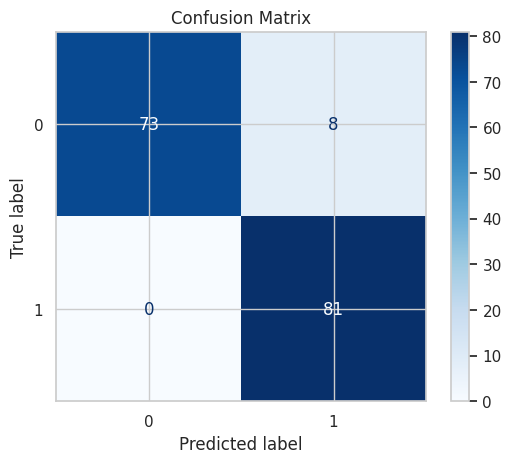

In [104]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_final, y_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()